***Sergi Cózar Badia***

<h1>PROYECTO DE LIMPIEZA, ANÁLISIS Y VISUALIZACIÓN DE DATOS</h1>

En este proyecto se mostrará como es el proceso de limpieza, análisis y visualización de datos, seguiremos los siguientes pasos:

- En primer lugar, **limpiaremos y filtraremos datos**.

- En segundo lugar, **realizaremos un análisis exploratorio de los datos** que nos permitirá continuar con la limpieza y pre-procesado de los datos.

- Por último, **haremos una aproximación** a **posibles problemas de regresión** y **clasificación**.

Para realizar este proyecto, se utilizará un conjunto de datos relacionados con **películas**.

Antes de empezar, cargamos todas las ***librerías*** que necesitaremos para el proyecto:

In [1]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.stats import shapiro
from scipy.stats import mannwhitneyu
from scipy.stats import kruskal

<h2>Limpieza y preparación de los datos</h2>

Cargamos el CSV **movies.csv** como DataFrame y lo mostramos:

In [2]:
df = pd.read_csv('movies.csv')

df

,certificate,title,genre,director,stars,year,runtime,rating,metascore,votes,gross,critics
0,R,The Shawshank Redemption,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",1994,142,9.3,82.0,2780534.0,28.34,NaN
1,R,The Godfather,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1972,175,9.2,100.0,1935895.0,134.97,NaN
2,PG,Ramayana: The Legend of Prince Rama,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",1993,135,9.2,NaN,12470.0,NaN,NaN
3,NaN,The Chaos Class,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",1975,87,9.2,NaN,42018.0,NaN,NaN
4,NaN,Daman,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",2022,121,9.1,NaN,13372.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9843,Not Rated,Welcome to the Jungle,"Action, Adventure, Comedy","['Rob Meltzer', 'Jean-Claude Van Damme', 'Adam...","['Jean-Claude Van Damme', 'Adam Brody', 'Rob H...",I) (2013,95,4.9,25.0,13770.0,NaN,NaN
9844,R,Boat Trip,Comedy,"['Mort Nathan', 'Cuba Gooding Jr.', 'Horatio S...","['Cuba Gooding Jr.', 'Horatio Sanz', 'Roselyn ...",2002,94,4.9,18.0,31972.0,8.59,NaN
9845,PG-13,Did You Hear About the Morgans?,"Comedy, Drama, Romance","['Marc Lawrence', 'Hugh Grant', 'Sarah Jessica...","['Hugh Grant', 'Sarah Jessica Parker', 'Sam El...",2009,103,4.9,27.0,41830.0,29.58,NaN
9846,R,The Crow: Salvation,"Action, Crime, Fantasy","['Bharat Nalluri', 'Kirsten Dunst', 'William A...","['Kirsten Dunst', 'William Atherton', 'Debbie ...",2000,102,4.9,NaN,11938.0,NaN,NaN


Revisamos el **tipo de datos**:

In [3]:
df.dtypes

,0
certificate,object
title,object
genre,object
director,object
stars,object
year,object
runtime,int64
rating,float64
metascore,float64
votes,float64


Revisamos si hay **instancias duplicadas**:

In [4]:
print('Tamaño del DataFrame antes de eliminar duplicados:', df.shape)

Tamaño del DataFrame antes de eliminar duplicados: (9848, 12)


In [5]:
print('Tamaño del DataFrame después de eliminar duplicados:', df.drop_duplicates().shape)

Tamaño del DataFrame después de eliminar duplicados: (9846, 12)


In [6]:
print('Hay '+ str(df.shape[0]-df.drop_duplicates().shape[0])+' instancias duplicadas.')

Hay 2 instancias duplicadas.


Eliminamos las **dos instancias duplicadas** y mostramos de nuevo el DataFrame:

In [7]:
df.drop_duplicates(inplace=True)

df

,certificate,title,genre,director,stars,year,runtime,rating,metascore,votes,gross,critics
0,R,The Shawshank Redemption,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",1994,142,9.3,82.0,2780534.0,28.34,NaN
1,R,The Godfather,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1972,175,9.2,100.0,1935895.0,134.97,NaN
2,PG,Ramayana: The Legend of Prince Rama,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",1993,135,9.2,NaN,12470.0,NaN,NaN
3,NaN,The Chaos Class,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",1975,87,9.2,NaN,42018.0,NaN,NaN
4,NaN,Daman,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",2022,121,9.1,NaN,13372.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9843,Not Rated,Welcome to the Jungle,"Action, Adventure, Comedy","['Rob Meltzer', 'Jean-Claude Van Damme', 'Adam...","['Jean-Claude Van Damme', 'Adam Brody', 'Rob H...",I) (2013,95,4.9,25.0,13770.0,NaN,NaN
9844,R,Boat Trip,Comedy,"['Mort Nathan', 'Cuba Gooding Jr.', 'Horatio S...","['Cuba Gooding Jr.', 'Horatio Sanz', 'Roselyn ...",2002,94,4.9,18.0,31972.0,8.59,NaN
9845,PG-13,Did You Hear About the Morgans?,"Comedy, Drama, Romance","['Marc Lawrence', 'Hugh Grant', 'Sarah Jessica...","['Hugh Grant', 'Sarah Jessica Parker', 'Sam El...",2009,103,4.9,27.0,41830.0,29.58,NaN
9846,R,The Crow: Salvation,"Action, Crime, Fantasy","['Bharat Nalluri', 'Kirsten Dunst', 'William A...","['Kirsten Dunst', 'William Atherton', 'Debbie ...",2000,102,4.9,NaN,11938.0,NaN,NaN


A continuación procedemos a **la limpieza de datos numéricos**, eliminaremos ***símbolos o caracteres*** (cualquier carácter que no sea un número o un punto) que imposibilitan que la variable sea tomada como ***int o float*** y sea considerada como un ***objeto o string***. Este paso nos permitirá realizar operaciones y agrupaciones con los valores numéricos. En caso contrario, no se podría realizar ninguna operación matemática con las variables.

In [8]:
numeric_columns = ['rating', 'metascore', 'votes', 'gross', 'critics']

for column in numeric_columns:
  df[column]= df[column].apply(lambda x:  x if pd.isnull(x) else re.sub('[^0-9 ^\. ^\, ^-]', '', str(x)))
  df[column]= df[column].astype(float)

df.head(100)

,certificate,title,genre,director,stars,year,runtime,rating,metascore,votes,gross,critics
0,R,The Shawshank Redemption,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",1994,142,9.3,82.0,2780534.0,28.34,NaN
1,R,The Godfather,"Crime, Drama","['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1972,175,9.2,100.0,1935895.0,134.97,NaN
2,PG,Ramayana: The Legend of Prince Rama,"Animation, Action, Adventure","['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",1993,135,9.2,NaN,12470.0,NaN,NaN
3,NaN,The Chaos Class,"Comedy, Drama","['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",1975,87,9.2,NaN,42018.0,NaN,NaN
4,NaN,Daman,"Adventure, Drama","['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",2022,121,9.1,NaN,13372.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,Sarpatta Parambarai,"Action, Drama, Sport","['Pa. Ranjith', 'Arya', 'Pasupathy', 'John Kok...","['Arya', 'Pasupathy', 'John Kokken', 'Shabeer ...",2021,173,8.5,NaN,24112.0,NaN,NaN
96,Not Rated,Kumbalangi Nights,"Comedy, Drama, Romance","['Madhu C. Narayanan', 'Shane Nigam', 'Soubin ...","['Shane Nigam', 'Soubin Shahir', 'Fahadh Faasi...",2019,135,8.5,NaN,16056.0,NaN,NaN
97,Not Rated,Jersey,"Drama, Sport","['Gowtam Tinnanuri', 'Nani', 'Shraddha Srinath...","['Nani', 'Shraddha Srinath', 'Sathyaraj', 'Ron...",2019,157,8.5,NaN,20327.0,NaN,NaN
98,TV-G,Operation 'Y' & Other Shurik's Adventures,"Comedy, Crime, Drama","['Leonid Gaidai', 'Aleksandr Demyanenko', 'Mik...","['Aleksandr Demyanenko', 'Mikhail Pugovkin', '...",1965,95,8.5,NaN,14160.0,NaN,NaN


La variable **genre** es una cadena de texto con uno o más géneros. Como queremos que sea una variable **categórica**, nos quedaremos solo con **el primer género** que aparece y lo guardaremos en la misma columna.

In [9]:
df['genre'] = df['genre'].str.split(',').str[0].str.strip()

df.head()

,certificate,title,genre,director,stars,year,runtime,rating,metascore,votes,gross,critics
0,R,The Shawshank Redemption,Drama,"['Frank Darabont', 'Tim Robbins', 'Morgan Free...","['Tim Robbins', 'Morgan Freeman', 'Bob Gunton'...",1994,142,9.3,82.0,2780534.0,28.34,NaN
1,R,The Godfather,Crime,"['Francis Ford Coppola', 'Marlon Brando', 'Al ...","['Marlon Brando', 'Al Pacino', 'James Caan', '...",1972,175,9.2,100.0,1935895.0,134.97,NaN
2,PG,Ramayana: The Legend of Prince Rama,Animation,"['Ram Mohan', 'Yûgô Sakô', 'Koichi Saski', 'Ar...","['Yûgô Sakô', 'Koichi Saski', 'Arun Govil', 'N...",1993,135,9.2,NaN,12470.0,NaN,NaN
3,NaN,The Chaos Class,Comedy,"['Ertem Egilmez', 'Kemal Sunal', 'Münir Özkul'...","['Kemal Sunal', 'Münir Özkul', 'Halit Akçatepe...",1975,87,9.2,NaN,42018.0,NaN,NaN
4,NaN,Daman,Adventure,"['Lenka Debiprasad', 'Vishal Mourya', 'Karan K...","['Vishal Mourya', 'Karan Kandhapan', 'Babushan...",2022,121,9.1,NaN,13372.0,NaN,NaN


Homogeneizamos los valores de **las variables categóricas** que sean cadenas de texto, de forma que estén todos en minúscula.

Esto permitirá que se puedan comparar diferentes valores y que no se consideren cadenas distintas.

In [10]:
df['certificate'] = df['certificate'].str.lower()
df['title'] = df['title'].str.lower()
df['genre'] = df['genre'].str.lower()
df['director'] = df['director'].str.lower()
df['stars'] = df['stars'].str.lower()

df.head()

,certificate,title,genre,director,stars,year,runtime,rating,metascore,votes,gross,critics
0,r,the shawshank redemption,drama,"['frank darabont', 'tim robbins', 'morgan free...","['tim robbins', 'morgan freeman', 'bob gunton'...",1994,142,9.3,82.0,2780534.0,28.34,NaN
1,r,the godfather,crime,"['francis ford coppola', 'marlon brando', 'al ...","['marlon brando', 'al pacino', 'james caan', '...",1972,175,9.2,100.0,1935895.0,134.97,NaN
2,pg,ramayana: the legend of prince rama,animation,"['ram mohan', 'yûgô sakô', 'koichi saski', 'ar...","['yûgô sakô', 'koichi saski', 'arun govil', 'n...",1993,135,9.2,NaN,12470.0,NaN,NaN
3,NaN,the chaos class,comedy,"['ertem egilmez', 'kemal sunal', 'münir özkul'...","['kemal sunal', 'münir özkul', 'halit akçatepe...",1975,87,9.2,NaN,42018.0,NaN,NaN
4,NaN,daman,adventure,"['lenka debiprasad', 'vishal mourya', 'karan k...","['vishal mourya', 'karan kandhapan', 'babushan...",2022,121,9.1,NaN,13372.0,NaN,NaN


A continuación, detectaremos valores **sin sentido** y reemplazarlos por ***np.nan***.

Definiremos como valores **sin sentido** valores de duración **runtime** menores de **60** minutos.

In [11]:
df['runtime'] = np.where(df['runtime'] < 60, np.nan, df['runtime'])

df.head()

,certificate,title,genre,director,stars,year,runtime,rating,metascore,votes,gross,critics
0,r,the shawshank redemption,drama,"['frank darabont', 'tim robbins', 'morgan free...","['tim robbins', 'morgan freeman', 'bob gunton'...",1994,142.0,9.3,82.0,2780534.0,28.34,NaN
1,r,the godfather,crime,"['francis ford coppola', 'marlon brando', 'al ...","['marlon brando', 'al pacino', 'james caan', '...",1972,175.0,9.2,100.0,1935895.0,134.97,NaN
2,pg,ramayana: the legend of prince rama,animation,"['ram mohan', 'yûgô sakô', 'koichi saski', 'ar...","['yûgô sakô', 'koichi saski', 'arun govil', 'n...",1993,135.0,9.2,NaN,12470.0,NaN,NaN
3,NaN,the chaos class,comedy,"['ertem egilmez', 'kemal sunal', 'münir özkul'...","['kemal sunal', 'münir özkul', 'halit akçatepe...",1975,87.0,9.2,NaN,42018.0,NaN,NaN
4,NaN,daman,adventure,"['lenka debiprasad', 'vishal mourya', 'karan k...","['vishal mourya', 'karan kandhapan', 'babushan...",2022,121.0,9.1,NaN,13372.0,NaN,NaN


Seguidamente, vamos a obtener un mapa de calor **heatmap** en el que se pueda visualizar fácilmente los valores ***NaN*** que hay en el dataset.

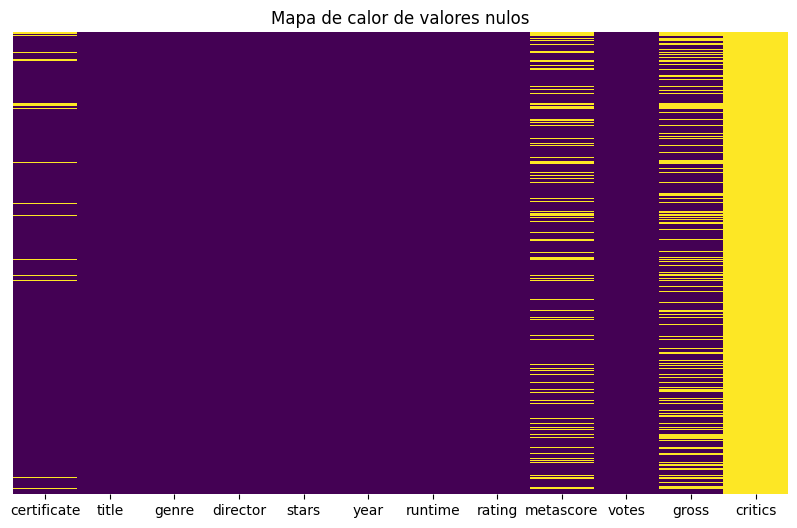

In [12]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Mapa de calor de valores nulos')

plt.show()

A continuación implementaremos un **loop** que elimine las variables **columnas** con todos los valores en ***NaN***, mostraremos el DataFrame antes y después de pasárselo por el código.

In [13]:
print('Dimensiones del DataFrame antes de la eliminación:', df.size)

Dimensiones del DataFrame antes de la eliminación: 118152


In [14]:
for col in df.columns:
    if df[col].isnull().all():
        df.drop(col, axis=1, inplace=True)

In [15]:
print('Dimensiones del DataFrame después de eliminación:', df.size)

Dimensiones del DataFrame después de eliminación: 108306


Ahora que hemos eliminado la columna **critics**, obtenemos el porcentaje de ***NaN*** que tiene cada elemento **película** y añadimos ese porcentaje en una nueva columna.

In [16]:
df['percent_nan'] = round(df.isnull().mean(axis=1) * 100, 2)

df

,certificate,title,genre,director,stars,year,runtime,rating,metascore,votes,gross,percent_nan
0,r,the shawshank redemption,drama,"['frank darabont', 'tim robbins', 'morgan free...","['tim robbins', 'morgan freeman', 'bob gunton'...",1994,142.0,9.3,82.0,2780534.0,28.34,0.00
1,r,the godfather,crime,"['francis ford coppola', 'marlon brando', 'al ...","['marlon brando', 'al pacino', 'james caan', '...",1972,175.0,9.2,100.0,1935895.0,134.97,0.00
2,pg,ramayana: the legend of prince rama,animation,"['ram mohan', 'yûgô sakô', 'koichi saski', 'ar...","['yûgô sakô', 'koichi saski', 'arun govil', 'n...",1993,135.0,9.2,NaN,12470.0,NaN,18.18
3,NaN,the chaos class,comedy,"['ertem egilmez', 'kemal sunal', 'münir özkul'...","['kemal sunal', 'münir özkul', 'halit akçatepe...",1975,87.0,9.2,NaN,42018.0,NaN,27.27
4,NaN,daman,adventure,"['lenka debiprasad', 'vishal mourya', 'karan k...","['vishal mourya', 'karan kandhapan', 'babushan...",2022,121.0,9.1,NaN,13372.0,NaN,27.27
...,...,...,...,...,...,...,...,...,...,...,...,...
9843,not rated,welcome to the jungle,action,"['rob meltzer', 'jean-claude van damme', 'adam...","['jean-claude van damme', 'adam brody', 'rob h...",I) (2013,95.0,4.9,25.0,13770.0,NaN,9.09
9844,r,boat trip,comedy,"['mort nathan', 'cuba gooding jr.', 'horatio s...","['cuba gooding jr.', 'horatio sanz', 'roselyn ...",2002,94.0,4.9,18.0,31972.0,8.59,0.00
9845,pg-13,did you hear about the morgans?,comedy,"['marc lawrence', 'hugh grant', 'sarah jessica...","['hugh grant', 'sarah jessica parker', 'sam el...",2009,103.0,4.9,27.0,41830.0,29.58,0.00
9846,r,the crow: salvation,action,"['bharat nalluri', 'kirsten dunst', 'william a...","['kirsten dunst', 'william atherton', 'debbie ...",2000,102.0,4.9,NaN,11938.0,NaN,18.18


Eliminamos los elementos que tengan más del **40%** de ***NaN***.

In [17]:
filas_originales = df.shape[0]
columnas_originales = df.shape[1]

max_nan = int(columnas_originales * 0.4)

df = df[df.isnull().sum(axis=1) <= max_nan]

filas_eliminadas = filas_originales - df.shape[0]
columnas_eliminadas = columnas_originales - df.shape[1]

print(f"Dimensiones del DataFrame antes de la eliminación: {filas_originales} filas, {columnas_originales} columnas")
print(f"Dimensiones del DataFrame después de la eliminación: {df.shape[0]} filas, {df.shape[1]} columnas")
print(f"Cantidad de filas eliminadas: {filas_eliminadas}")

Dimensiones del DataFrame antes de la eliminación: 9846 filas, 12 columnas
Dimensiones del DataFrame después de la eliminación: 9843 filas, 12 columnas
Cantidad de filas eliminadas: 3


Eliminamos las columnas **certificate** y **percent_enan**, ya que a partir de este punto no nos aportarán más información.

In [18]:
if "certificate" in df.columns:
    df = df.drop("certificate", axis=1)

if "percent_nan" in df.columns:
    df = df.drop("percent_nan", axis=1)

df.head()

,title,genre,director,stars,year,runtime,rating,metascore,votes,gross
0,the shawshank redemption,drama,"['frank darabont', 'tim robbins', 'morgan free...","['tim robbins', 'morgan freeman', 'bob gunton'...",1994,142.0,9.3,82.0,2780534.0,28.34
1,the godfather,crime,"['francis ford coppola', 'marlon brando', 'al ...","['marlon brando', 'al pacino', 'james caan', '...",1972,175.0,9.2,100.0,1935895.0,134.97
2,ramayana: the legend of prince rama,animation,"['ram mohan', 'yûgô sakô', 'koichi saski', 'ar...","['yûgô sakô', 'koichi saski', 'arun govil', 'n...",1993,135.0,9.2,NaN,12470.0,NaN
3,the chaos class,comedy,"['ertem egilmez', 'kemal sunal', 'münir özkul'...","['kemal sunal', 'münir özkul', 'halit akçatepe...",1975,87.0,9.2,NaN,42018.0,NaN
4,daman,adventure,"['lenka debiprasad', 'vishal mourya', 'karan k...","['vishal mourya', 'karan kandhapan', 'babushan...",2022,121.0,9.1,NaN,13372.0,NaN


Creamos de nuevo la variable **numeric_colums** esta vez sin **critics**, ya que la hemos eliminado del DataFrame. Imputamos a los valores de DataFrame que todavía sean ***NaN***, la media calculada de su respectiva variable **columna**.

In [19]:
numeric_columns = ['rating', 'metascore', 'votes', 'gross']

media = df[numeric_columns].median()
df[numeric_columns] = df[numeric_columns].fillna(media)

df

,title,genre,director,stars,year,runtime,rating,metascore,votes,gross
0,the shawshank redemption,drama,"['frank darabont', 'tim robbins', 'morgan free...","['tim robbins', 'morgan freeman', 'bob gunton'...",1994,142.0,9.3,82.0,2780534.0,28.340
1,the godfather,crime,"['francis ford coppola', 'marlon brando', 'al ...","['marlon brando', 'al pacino', 'james caan', '...",1972,175.0,9.2,100.0,1935895.0,134.970
2,ramayana: the legend of prince rama,animation,"['ram mohan', 'yûgô sakô', 'koichi saski', 'ar...","['yûgô sakô', 'koichi saski', 'arun govil', 'n...",1993,135.0,9.2,59.5,12470.0,17.045
3,the chaos class,comedy,"['ertem egilmez', 'kemal sunal', 'münir özkul'...","['kemal sunal', 'münir özkul', 'halit akçatepe...",1975,87.0,9.2,59.5,42018.0,17.045
4,daman,adventure,"['lenka debiprasad', 'vishal mourya', 'karan k...","['vishal mourya', 'karan kandhapan', 'babushan...",2022,121.0,9.1,59.5,13372.0,17.045
...,...,...,...,...,...,...,...,...,...,...
9843,welcome to the jungle,action,"['rob meltzer', 'jean-claude van damme', 'adam...","['jean-claude van damme', 'adam brody', 'rob h...",I) (2013,95.0,4.9,25.0,13770.0,17.045
9844,boat trip,comedy,"['mort nathan', 'cuba gooding jr.', 'horatio s...","['cuba gooding jr.', 'horatio sanz', 'roselyn ...",2002,94.0,4.9,18.0,31972.0,8.590
9845,did you hear about the morgans?,comedy,"['marc lawrence', 'hugh grant', 'sarah jessica...","['hugh grant', 'sarah jessica parker', 'sam el...",2009,103.0,4.9,27.0,41830.0,29.580
9846,the crow: salvation,action,"['bharat nalluri', 'kirsten dunst', 'william a...","['kirsten dunst', 'william atherton', 'debbie ...",2000,102.0,4.9,59.5,11938.0,17.045


Por último, comprobamos que no exista ningún ***NaN*** mediante un nuevo **mapa de color**.

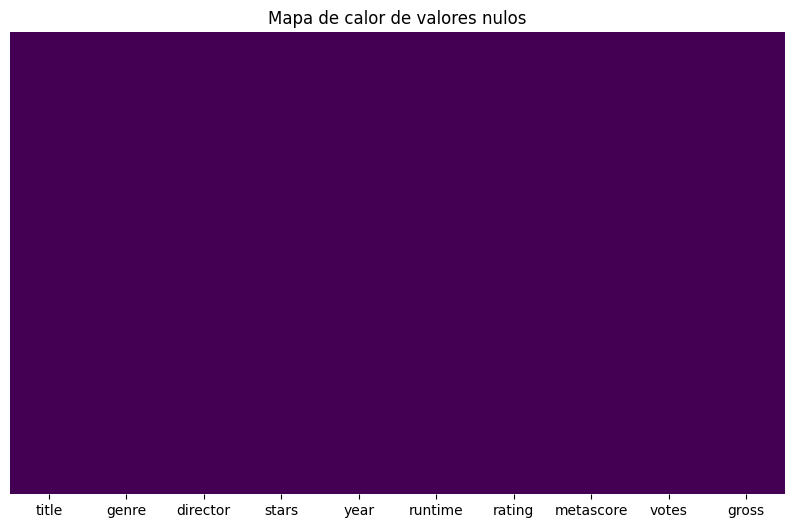

In [20]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)

plt.title('Mapa de calor de valores nulos')

plt.show()

Tal y como hemos hecho anteriormente con la variable **genre**, ahora al no tener ***NaN's*** podemos limpiar las variables **director** y **stars**.

Para ello, nos quedaremos solo con **el primero de los directores/as** y **el primero de los actores/actrices**, como hemos hecho con el **genre**, guardándolo en la misma columna. Además, se limpiarán todos los caracteres que no sean puramente alfabéticos.

In [21]:
df['stars'] = df['stars'].apply(ast.literal_eval).str[0].str.replace(r'[^a-zA-Z\s]', '', regex=True)
df['director'] = df['director'].apply(ast.literal_eval).str[0].str.replace(r'[^a-zA-Z\s]', '', regex=True)

df

,title,genre,director,stars,year,runtime,rating,metascore,votes,gross
0,the shawshank redemption,drama,frank darabont,tim robbins,1994,142.0,9.3,82.0,2780534.0,28.340
1,the godfather,crime,francis ford coppola,marlon brando,1972,175.0,9.2,100.0,1935895.0,134.970
2,ramayana: the legend of prince rama,animation,ram mohan,yg sak,1993,135.0,9.2,59.5,12470.0,17.045
3,the chaos class,comedy,ertem egilmez,kemal sunal,1975,87.0,9.2,59.5,42018.0,17.045
4,daman,adventure,lenka debiprasad,vishal mourya,2022,121.0,9.1,59.5,13372.0,17.045
...,...,...,...,...,...,...,...,...,...,...
9843,welcome to the jungle,action,rob meltzer,jeanclaude van damme,I) (2013,95.0,4.9,25.0,13770.0,17.045
9844,boat trip,comedy,mort nathan,cuba gooding jr,2002,94.0,4.9,18.0,31972.0,8.590
9845,did you hear about the morgans?,comedy,marc lawrence,hugh grant,2009,103.0,4.9,27.0,41830.0,29.580
9846,the crow: salvation,action,bharat nalluri,kirsten dunst,2000,102.0,4.9,59.5,11938.0,17.045


<h2>Análisis estadístico</h2>

Una vez hecha la limpieza de los datos, procedemos al análisis estadístico. Mostramos cuántos **géneros** tenemos y obtenemos las principales métricas estadísticas (***media, mediana, desviación estándar, percentil 25, percentil 75, moda, máximo, mínimo***) de las **variables numéricas**.

In [22]:
num_genre = df['genre'].nunique()

print(f"Número de géneros únicos: {num_genre}")
print("\nGéneros únicos:")
print(df['genre'].unique())

Número de géneros únicos: 19

Géneros únicos:
['drama' 'crime' 'animation' 'comedy' 'adventure' 'action' 'biography'
 'horror' 'western' 'mystery' 'film-noir' 'fantasy' 'family' 'thriller'
 'romance' 'sci-fi' 'musical' 'music' 'history']


In [23]:
numeric_stats = df.describe()

mode_values = df.mode().iloc[0]

numeric_stats.loc['mode'] = mode_values

print("\nPrincipales métricas estadísticas de las variables numéricas:")
print(numeric_stats)


Principales métricas estadísticas de las variables numéricas:
           runtime       rating    metascore         votes        gross
count  9837.000000  9843.000000  9843.000000  9.843000e+03  9843.000000
mean    110.636983     6.723154    59.153358  9.087890e+04    33.474785
std      21.818125     0.813475    15.405775  1.668752e+05    57.439811
min      60.000000     4.900000     7.000000  1.000000e+04     0.000000
25%      96.000000     6.100000    50.000000  1.684450e+04     6.560000
50%     106.000000     6.700000    59.500000  3.408000e+04    17.045000
75%     120.000000     7.300000    68.000000  9.058950e+04    32.875000
max     439.000000     9.300000   100.000000  2.780534e+06   936.660000
mode     95.000000     6.700000    59.500000  1.070000e+04    17.045000


Representamos la distribución de las variables **numéricas** y realizamos el **test de normalidad** en cada una de ellas para valorar si siguen una **distribución normal**.

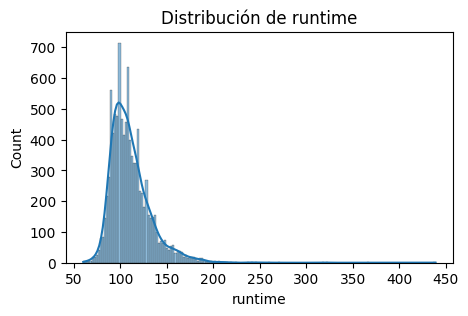

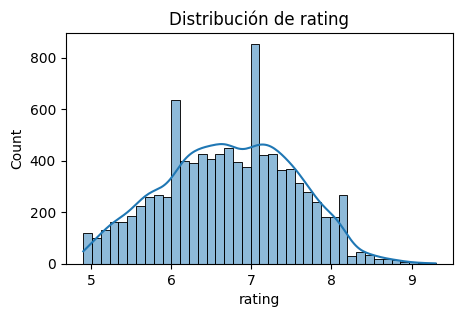

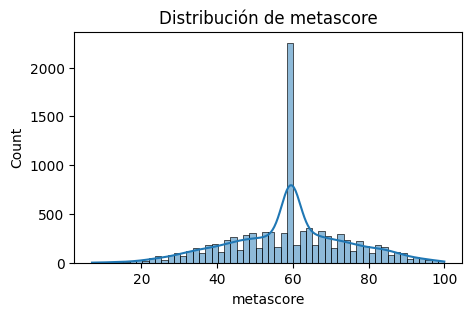

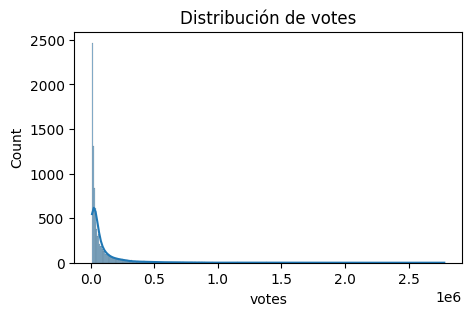

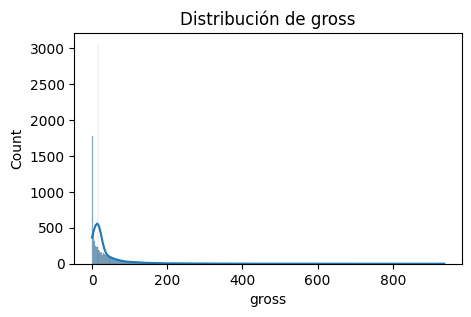

In [24]:
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

for column in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

Realizamos los test.

In [25]:
for column in numeric_columns:
    stat, p_value = shapiro(df[column])
    print(f'Test de normalidad por {column}: Estadística={stat:.4f}, p-value={p_value:.4f}')
    alpha = 0.05
    if p_value > alpha:
        print(f'No se rechaza la hipótesis nula. {column} sigue una distribución normal.\n')
    else:
        print(f'Se rechaza la hipótesis nula. {column} no sigue una distribución normal.\n')

Test de normalidad por runtime: Estadística=nan, p-value=nan
Se rechaza la hipótesis nula. runtime no sigue una distribución normal.

Test de normalidad por rating: Estadística=0.9910, p-value=0.0000
Se rechaza la hipótesis nula. rating no sigue una distribución normal.

Test de normalidad por metascore: Estadística=0.9843, p-value=0.0000
Se rechaza la hipótesis nula. metascore no sigue una distribución normal.

Test de normalidad por votes: Estadística=0.4754, p-value=0.0000
Se rechaza la hipótesis nula. votes no sigue una distribución normal.

Test de normalidad por gross: Estadística=0.5179, p-value=0.0000
Se rechaza la hipótesis nula. gross no sigue una distribución normal.



/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 9843.
  res = hypotest_fun_out(*samples, **kwds)


A continuación observaremos si la distribución de la **duración** es estadísticamente distinta en los géneros **Drama** y **Crime**.

Aplicamos el test correspondiente y representamos las distribuciones para **Drama** y **Crime** en una misma gráfica para observar gráficamente las discrepancias en caso de que haya.

La selección del test dependerá de si las distribuciones son o no normales (resultados del apartado anterior).

In [26]:
drama_data = df[df['genre'] == 'drama']['runtime']
crime_data = df[df['genre'] == 'crime']['runtime']

statistic, p_value = mannwhitneyu(drama_data, crime_data)
print(f'Mann-Whitney U Test - Statistic: {statistic}, p-value: {p_value}')

Mann-Whitney U Test - Statistic: 844031.5, p-value: 0.06444401742228727


Representamos las distribuciones.

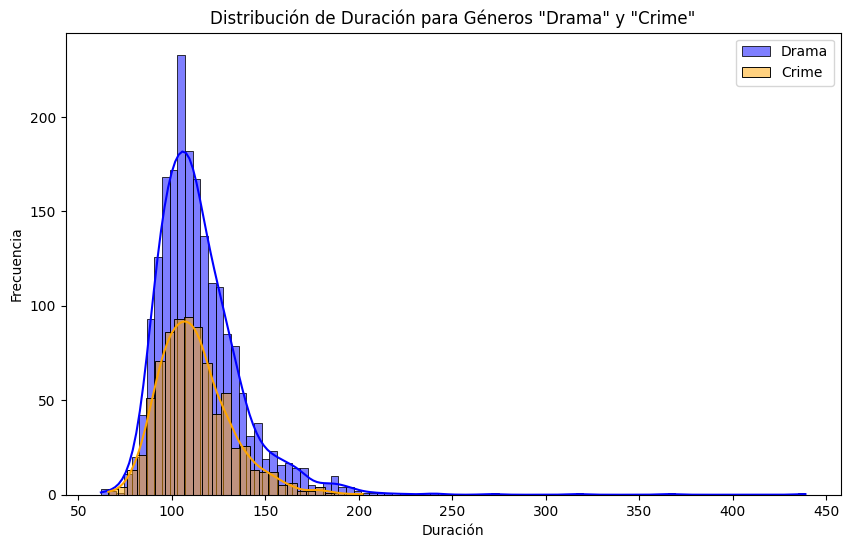

In [27]:
plt.figure(figsize=(10, 6))

sns.histplot(drama_data, kde=True, label='Drama', color='blue')
sns.histplot(crime_data, kde=True, label='Crime', color='orange')

plt.title('Distribución de Duración para Géneros "Drama" y "Crime"')
plt.xlabel('Duración')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

A continuación observaremos si la distribución del **rating** es estadísticamente distinta en los géneros **Drama** y **Crime**.

Aplicamos el test correspondiente y representamos las distribuciones para **Drama** y **Crime** en una misma gráfica para observar gráficamente las discrepancias en caso de que haya.

La selección del test dependerá de si las distribuciones son o no normales (resultados del apartado anterior).

In [28]:
drama_data = df[df['genre'] == 'drama']['rating']
crime_data = df[df['genre'] == 'crime']['rating']

statistic, p_value = mannwhitneyu(drama_data, crime_data)
print(f'Mann-Whitney U Test - Statistic: {statistic}, p-value: {p_value}')

Mann-Whitney U Test - Statistic: 830959.0, p-value: 0.2385248026268334


Representamos las distribuciones.

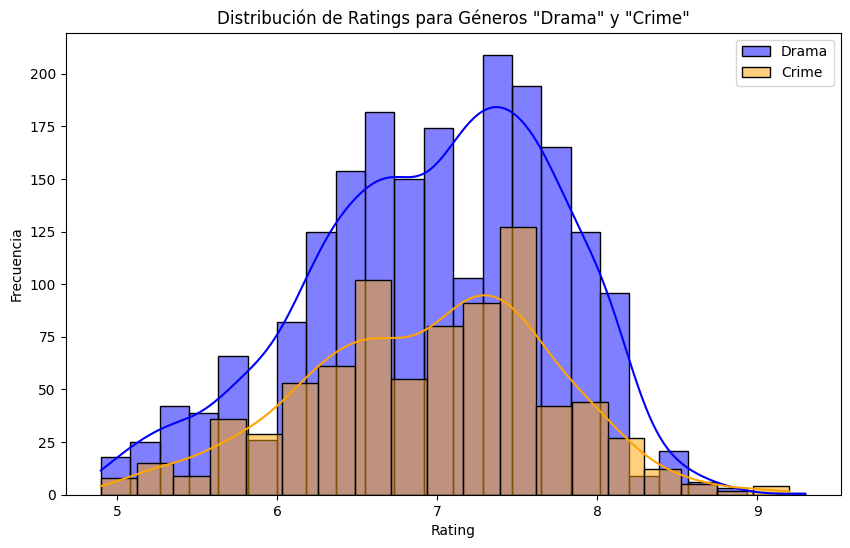

In [29]:
plt.figure(figsize=(10, 6))
sns.histplot(drama_data, kde=True, label='Drama', color='blue')
sns.histplot(crime_data, kde=True, label='Crime', color='orange')
plt.title('Distribución de Ratings para Géneros "Drama" y "Crime"')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

Discreteamos la variable de duración **runtime** en **4 valores** mediante el ***método de los cuartiles***.

Asignamos los valores discreteados a una nueva variable **new_runtime**.

In [30]:
df['new_runtime'] = pd.qcut(df['runtime'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])

df.head()

,title,genre,director,stars,year,runtime,rating,metascore,votes,gross,new_runtime
0,the shawshank redemption,drama,frank darabont,tim robbins,1994,142.0,9.3,82.0,2780534.0,28.340,Q4
1,the godfather,crime,francis ford coppola,marlon brando,1972,175.0,9.2,100.0,1935895.0,134.970,Q4
2,ramayana: the legend of prince rama,animation,ram mohan,yg sak,1993,135.0,9.2,59.5,12470.0,17.045,Q4
3,the chaos class,comedy,ertem egilmez,kemal sunal,1975,87.0,9.2,59.5,42018.0,17.045,Q1
4,daman,adventure,lenka debiprasad,vishal mourya,2022,121.0,9.1,59.5,13372.0,17.045,Q4


Obtenemos las tablas de frecuencia de las variables categóricas (incluida la creada en el apartado anterior).

In [31]:
frequency_tables = {}
categorical_columns = ['title', 'genre', 'director', 'stars', 'new_runtime']

for column in categorical_columns:
    frequency_tables[column] = df[column].value_counts()

for column, table in frequency_tables.items():
    print(f"\nTabla de frecuencia para '{column}':\n{table}")


Tabla de frecuencia para 'title':
title
the mummy                                          4
a star is born                                     4
beauty and the beast                               4
brothers                                           3
les misérables                                     3
                                                  ..
half nelson                                        1
desperado                                          1
parenthood                                         1
tremors                                            1
temptation: confessions of a marriage counselor    1
Name: count, Length: 9488, dtype: int64

Tabla de frecuencia para 'genre':
genre
comedy       2498
action       2318
drama        2015
crime         802
biography     581
adventure     536
animation     477
horror        472
fantasy        57
mystery        38
thriller       17
sci-fi          9
film-noir       8
family          4
romance         4
western         3
musical

Obtenemos los ***diagramas de frecuencias de las variables categóricas*** (incluida la variable discreteada). En el caso de las variables **director** y **stars** seleccionamos respectivamente **solo aquellos directores/as que aparecen más de 10 veces** y aquellos **actores/actrices que aparecen más de 25 veces.** De lo contrario el diagrama no sería legible.

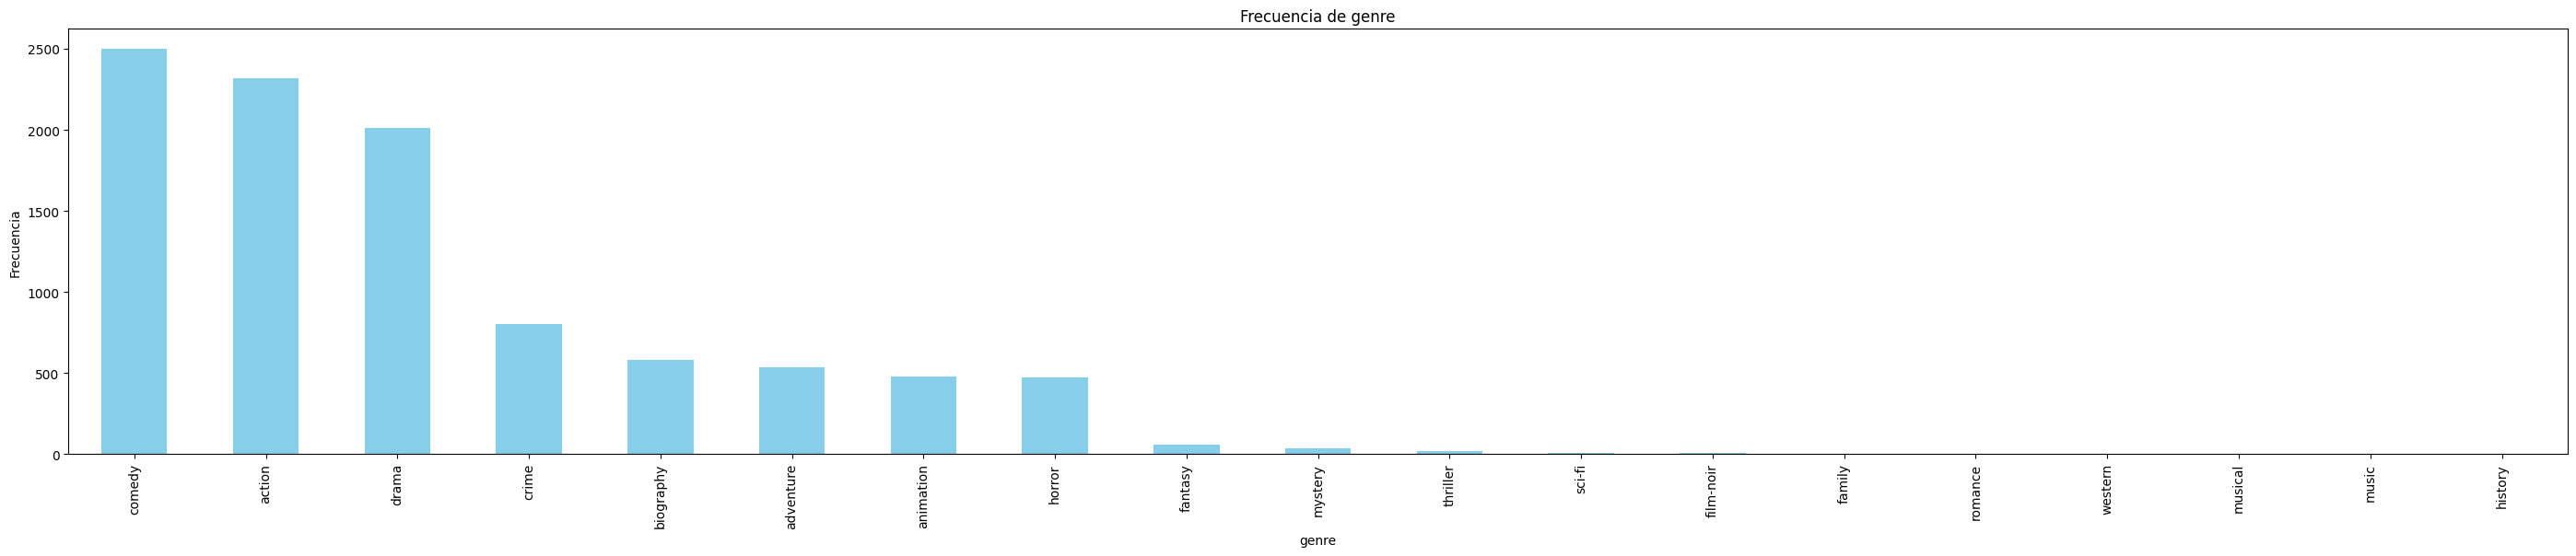

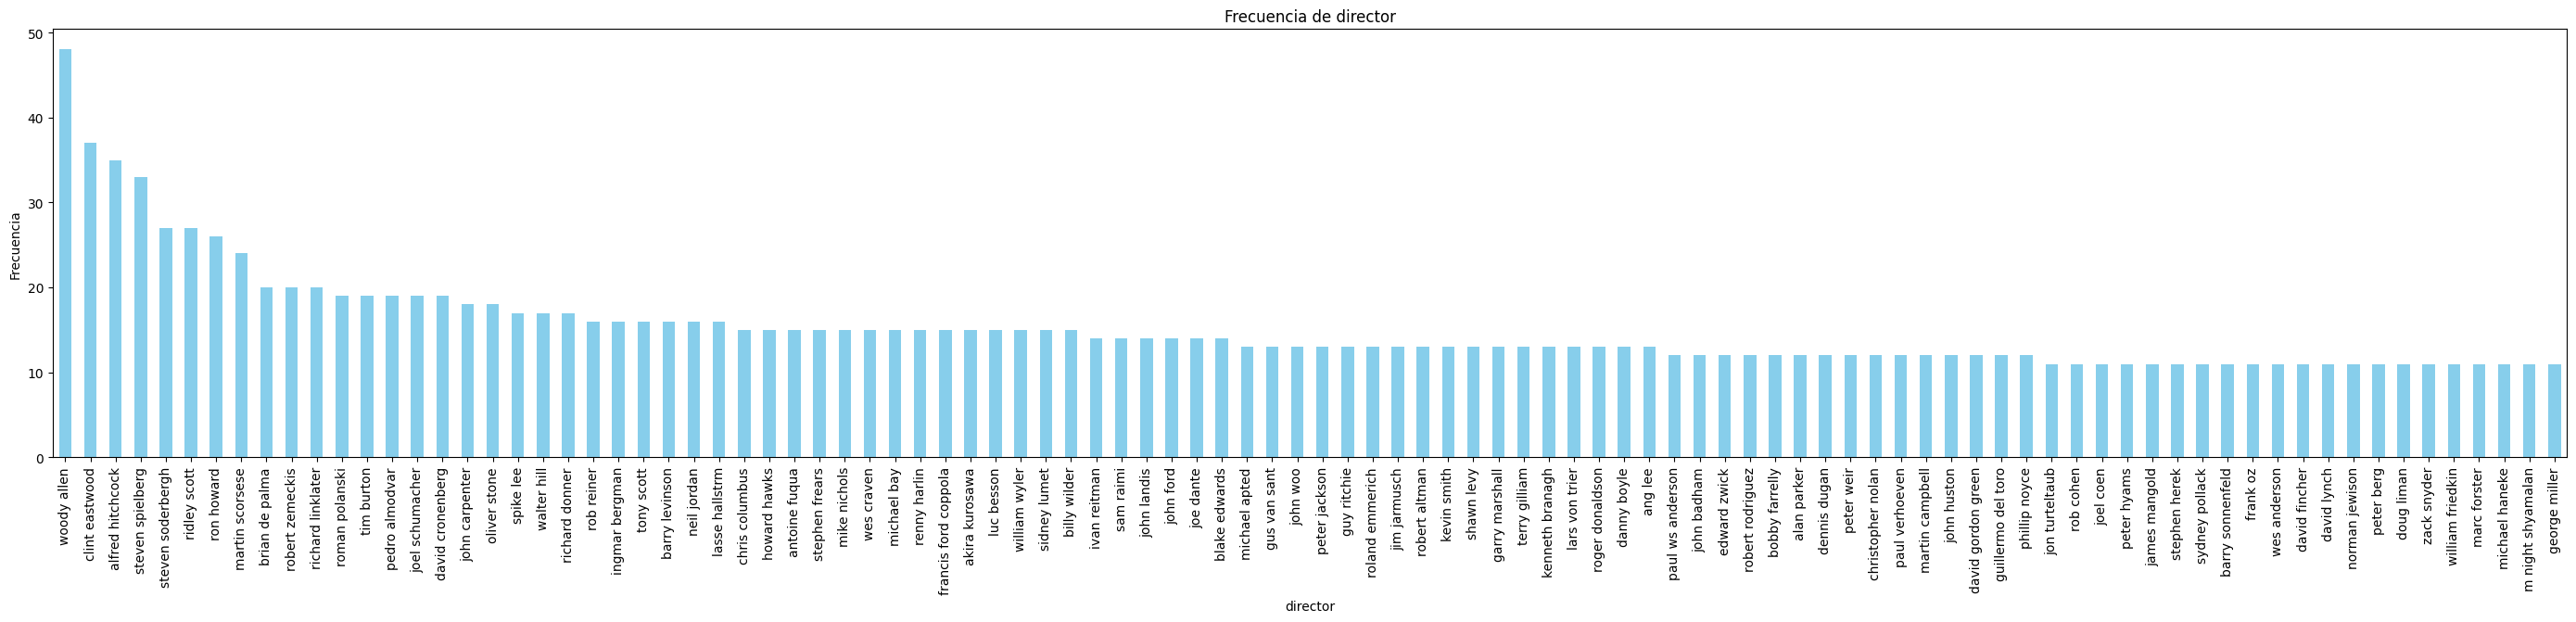

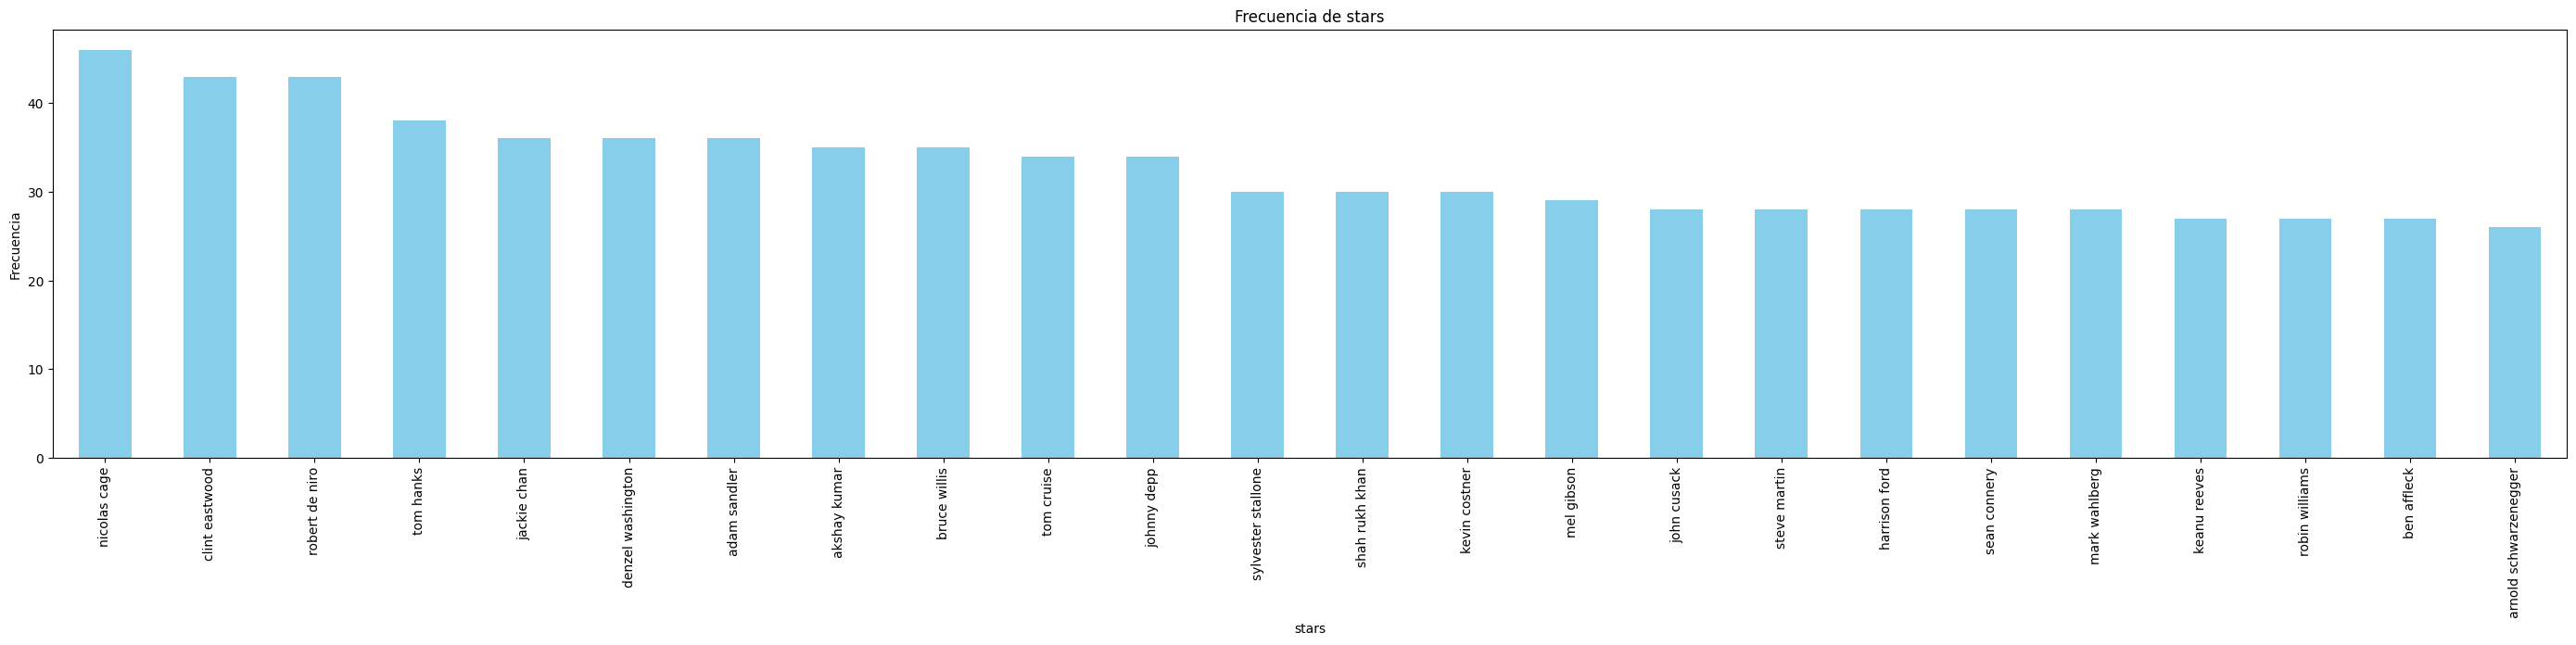

In [32]:
directors_counts = df['director'].value_counts()
selected_directors = directors_counts[directors_counts > 10].index
filtered_directors = df[df['director'].isin(selected_directors)]

stars_counts = df['stars'].value_counts()
selected_stars = stars_counts[stars_counts > 25].index
filtered_stars = df[df['stars'].isin(selected_stars)]

def plot_frequency_bar_chart(data, column):
    plt.figure(figsize=(35, 6))
    data[column].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Frecuencia de {column}')
    plt.xlabel(column)
    plt.ylabel('Frecuencia')
    plt.show()

plot_frequency_bar_chart(df, 'genre')

plot_frequency_bar_chart(filtered_directors, 'director')

plot_frequency_bar_chart(filtered_stars, 'stars')

Obtenemos la tabla de contingencia entre el **género** y la variable discreteada de la **duración**.

In [33]:
pd.crosstab(df['genre'], df['new_runtime'])

new_runtime,Q1,Q2,Q3,Q4
genre,,,,
action,427,463,627,799
adventure,135,131,125,145
animation,305,98,53,19
biography,38,83,197,263
comedy,855,746,558,338
crime,163,179,241,219
drama,376,448,567,624
family,0,3,0,1
fantasy,26,22,7,2


Aplicamos el test correspondiente para ver si la diferencia de duración entre los géneros de **animation** y **biography** es estadísticamente diferente.

La selección del test dependerá de si las distribuciones son normales o no.

In [34]:
animation_data = df[df['genre'] == 'animation']['runtime']
biography_data = df[df['genre'] == 'biography']['runtime']

statistic, p_value = mannwhitneyu(animation_data, biography_data)
print(f'Mann-Whitney U Test - Statistic: {statistic}, p-value: {p_value}')

if p_value < 0.05:
    print('La diferencia de duración entre los géneros de "animación" y "biography" es estadísticamente distinta.')
else:
    print('No hay evidencia suficiente para afirmar que la diferencia de duración entre los géneros animation y biography sea estadísticamente distinta.')

Mann-Whitney U Test - Statistic: nan, p-value: nan
No hay evidencia suficiente para afirmar que la diferencia de duración entre los géneros animation y biography sea estadísticamente distinta.


Aplicamos el test correspondiente para ver si la diferencia de duración entre los géneros de **advenure** y **mystery** es estadísticamente diferente.

La selección del test dependerá de si las distribuciones son normales o no.

In [35]:
adventure_data = df[df['genre'] == 'adventure']['runtime']
mystery_data = df[df['genre'] == 'mystery']['runtime']

statistic, p_value = mannwhitneyu(adventure_data, mystery_data)
print(f'Mann-Whitney U Test - Statistic: {statistic}, p-value: {p_value}')

if p_value < 0.05:
    print('La diferencia de duración entre los géneros adventure y mystery es estadísticamente distinta.')
else:
    print('No existe evidencia suficiente para afirmar que la diferencia de duración entre los géneros adventure y mystery sea estadísticamente distinta.')

Mann-Whitney U Test - Statistic: 9946.0, p-value: 0.809973959935437
No existe evidencia suficiente para afirmar que la diferencia de duración entre los géneros adventure y mystery sea estadísticamente distinta.


Aplicamos el test correspondiente y obtener el ***gráfico box-plot*** en el que se adviertan cómo se distribuyen los valores de **duración** por **género**, para ver si el factor **género** afecta en la **duración** o no.

In [36]:
statistic, p_value = kruskal(
    df[df['genre'] == 'drama']['runtime'],
    df[df['genre'] == 'crime']['runtime'],
    df[df['genre'] == 'animation']['runtime'],
    df[df['genre'] == 'adventure']['runtime'],
    df[df['genre'] == 'mystery']['runtime']
)


print(f'Kruskal-Wallis Test - Statistic: {statistic}, p-value: {p_value}')

Kruskal-Wallis Test - Statistic: nan, p-value: nan


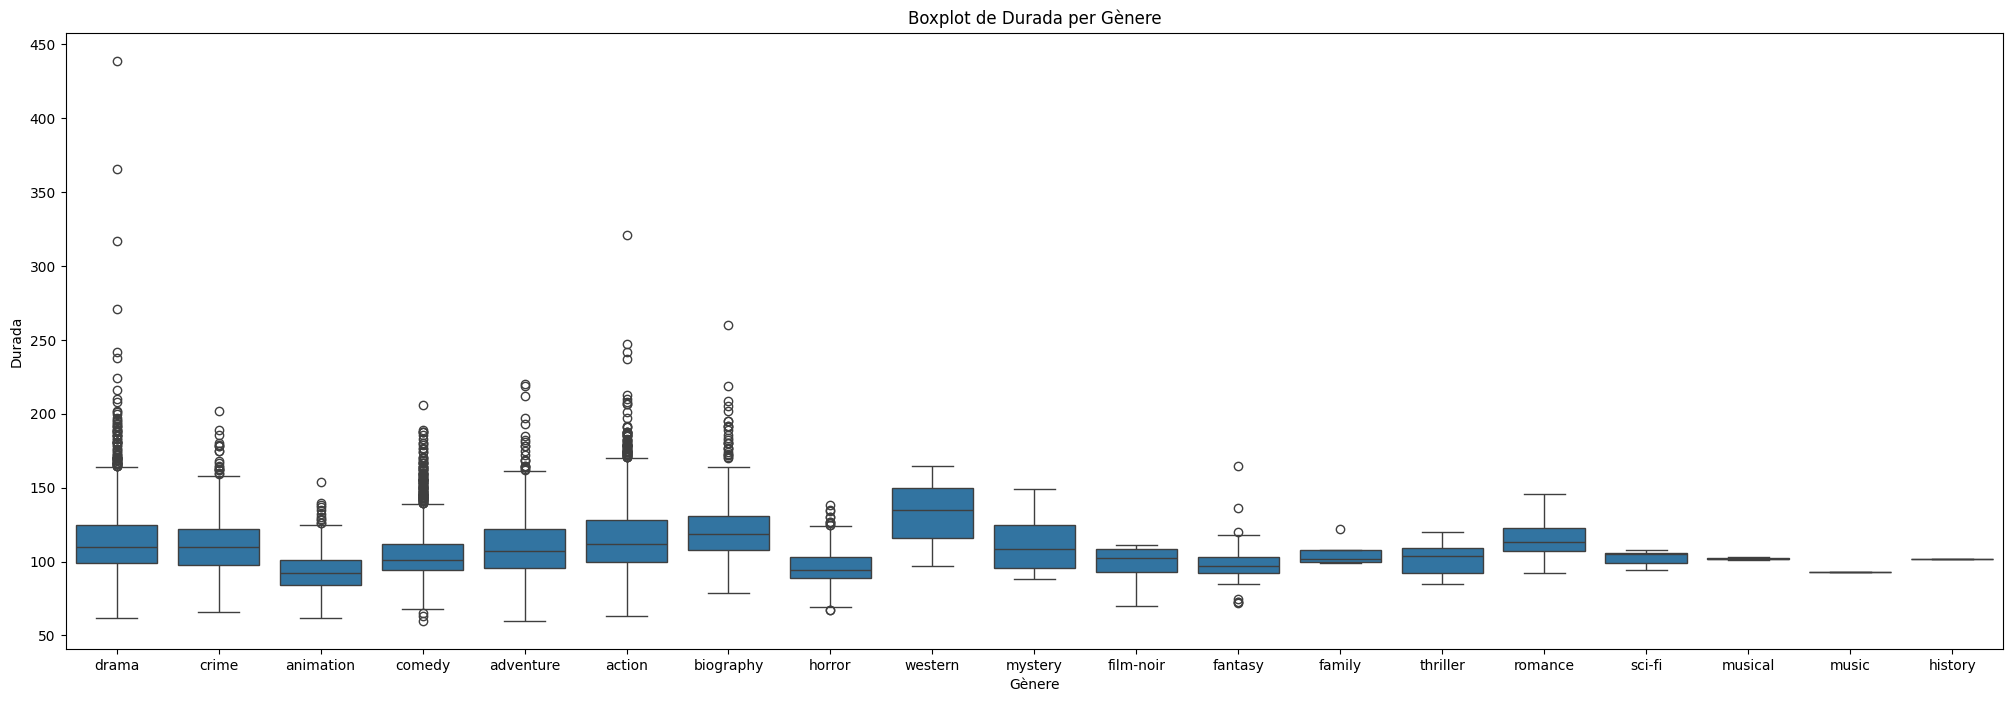

In [37]:
plt.figure(figsize=(25, 8))
sns.boxplot(x='genre', y='runtime', data=df)
plt.title('Boxplot de Durada per Gènere')
plt.xlabel('Gènere')
plt.ylabel('Durada')
plt.show()

<h2>Obtener información y visualizaciones</h2>

Finalmente, obtenemos la información y la visualizamos, a continuación, platearemos algunas peguntas.

*¿Cuáles son las películas del género **action** con mejor y peor **rating**?*

In [38]:
action_movies = df[df['genre'] == 'action']

best_rating_movie = action_movies[action_movies['rating'] == action_movies['rating'].max()][['title', 'rating']]

worst_rating_movie = action_movies[action_movies['rating'] == action_movies['rating'].min()][['title', 'rating']]

print("Película con el mejor rating:")
print(best_rating_movie)

print("\nPelícula con el peor rating:")
print(worst_rating_movie)

Película con el mejor rating:
                                           title  rating
5                                the dark knight     9.0
8  the lord of the rings: the return of the king     9.0

Película con el peor rating:
                                title  rating
9804                         anaconda     4.9
9807                   wild wild west     4.9
9809                            awake     4.9
9810  charlie's angels: full throttle     4.9
9812                     dracula 2000     4.9
9814                           primal     4.9
9816            the cold light of day     4.9
9818                 the darkest hour     4.9
9826                   ghosts of mars     4.9
9833              blues brothers 2000     4.9
9843            welcome to the jungle     4.9
9846              the crow: salvation     4.9


*¿Cuáles son las **10 películas** con mejor **rating**?*

In [39]:
top_10 = df.sort_values(by='rating', ascending=False).head(10)

print("Las 10 películas con mejor rating:")
print(top_10[['title']])

Las 10 películas con mejor rating:
                                           title
0                       the shawshank redemption
2            ramayana: the legend of prince rama
3                                the chaos class
1                                  the godfather
4                                          daman
5                                the dark knight
6                               schindler's list
7                                   12 angry men
8  the lord of the rings: the return of the king
9                          the godfather part ii


Representamos en un ***diagrama de barras*** el **rating** de las **20 películas** con mayor **rating** y género **mystery**, ordenadas de mayor a menor.

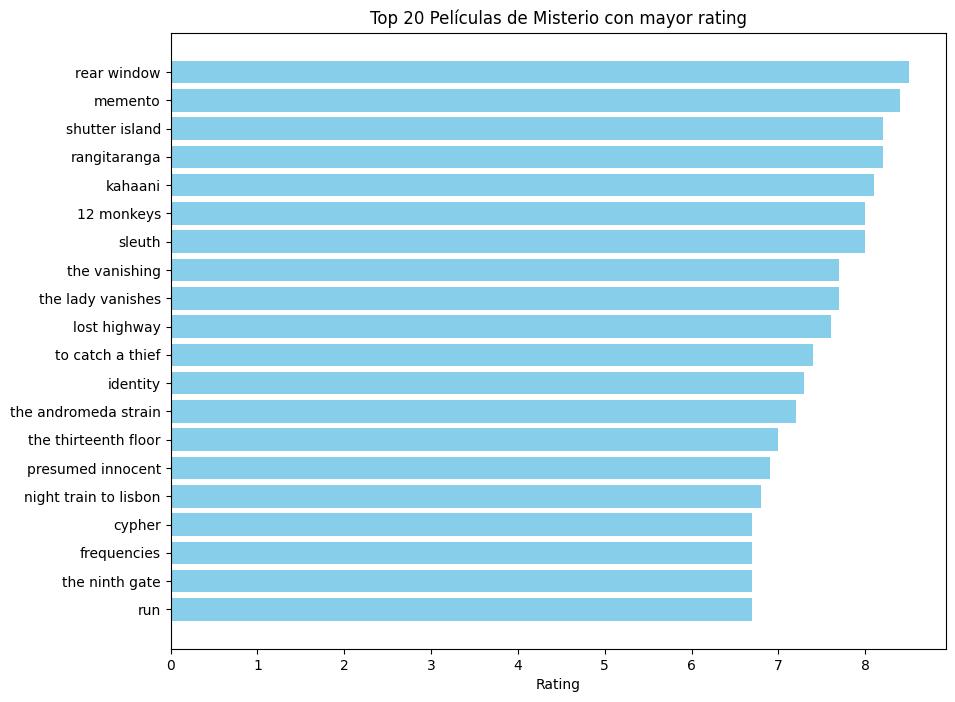

In [40]:
mystery_movies = df[df['genre'] == 'mystery'].sort_values(by='rating', ascending=False).head(20)


plt.figure(figsize=(10, 8))
plt.barh(mystery_movies['title'], mystery_movies['rating'], color='skyblue')

plt.xlabel('Rating')
plt.title('Top 20 Películas de Misterio con mayor rating')

plt.gca().invert_yaxis()

plt.show()

¿Qué **género** presenta en promedio mejor **rating**?

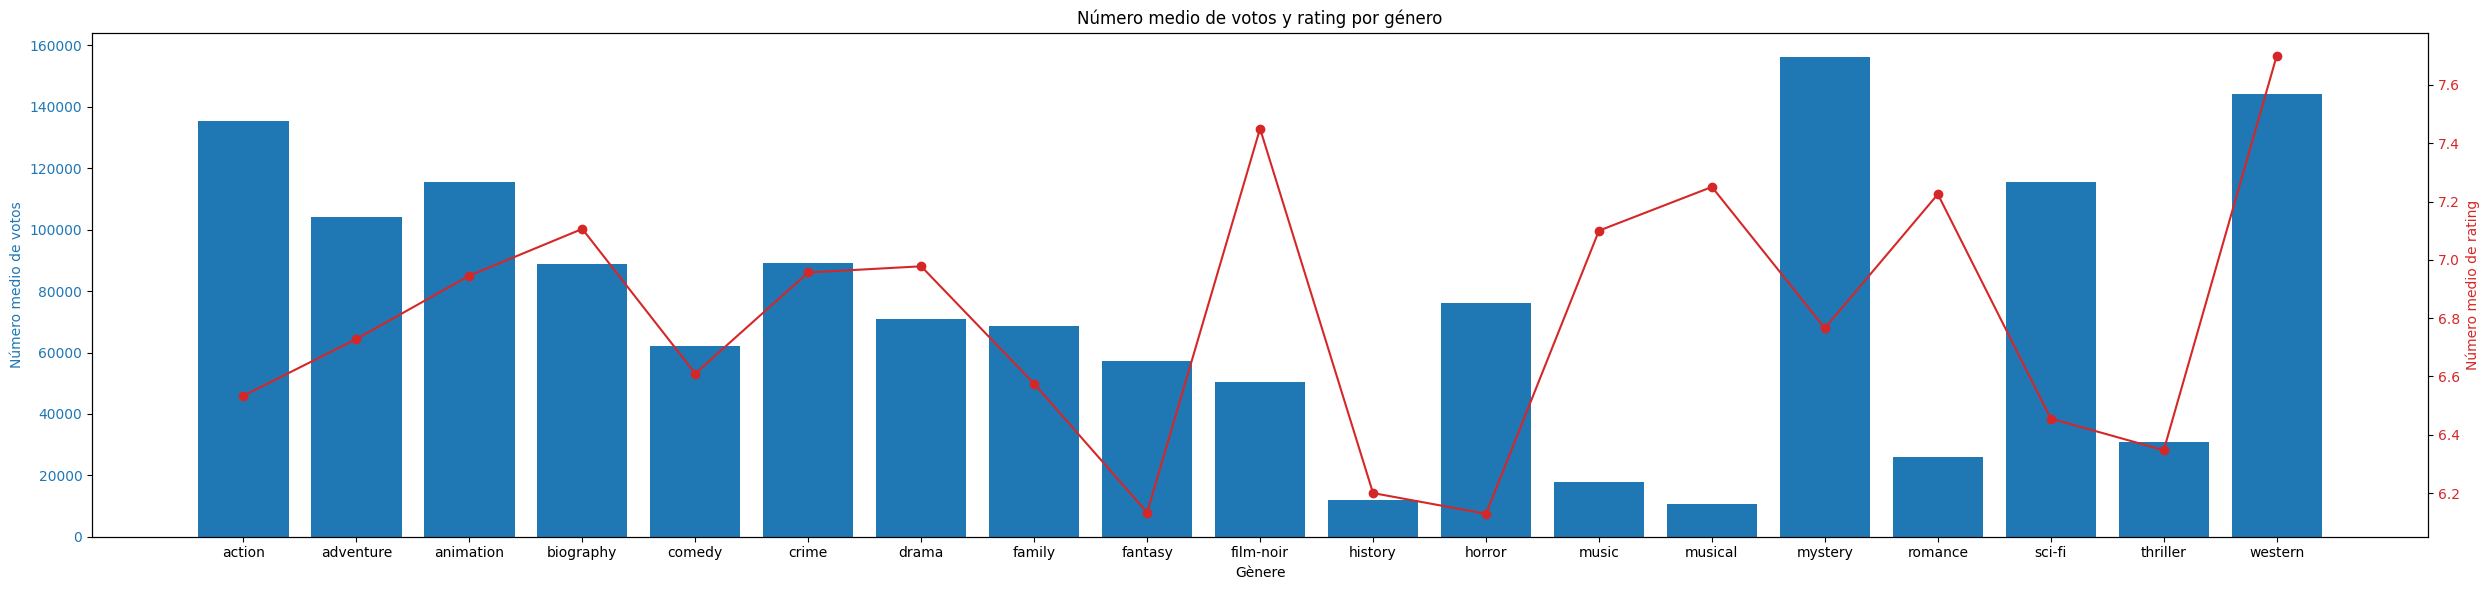

In [41]:
avg_votes_per_genre = df.groupby('genre')['votes'].mean()
avg_rating_per_genre = df.groupby('genre')['rating'].mean()

fig, ax1 = plt.subplots(figsize=(25, 6))

color = 'tab:blue'
ax1.set_xlabel('Gènere')
ax1.set_ylabel('Número medio de votos', color=color)
bars_votes = ax1.bar(avg_votes_per_genre.index, avg_votes_per_genre, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Número medio de rating', color=color)
line_rating = ax2.plot(avg_rating_per_genre.index, avg_rating_per_genre, color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Número medio de votos y rating por género')
fig.tight_layout()
plt.show()

Creamos un DataFrame que muestre para cada **género** una columna con la **película con mayor rating** (y ese rating) y la **película con menor rating** (y ese rating).

In [42]:
def get_best_and_worst_movies(group):
    best_movie = group.loc[group['rating'].idxmax()][['title', 'rating']]
    worst_movie = group.loc[group['rating'].idxmin()][['title', 'rating']]
    return pd.concat([best_movie, worst_movie], axis=0)

result_df = df.groupby('genre').apply(get_best_and_worst_movies).reset_index()
result_df.columns = ['Género', 'Mejor Película', 'Mejor Rating', 'Peor Película', 'Peor Rating']

print(result_df)

       Género                       Mejor Película  Mejor Rating  \
0      action                      the dark knight           9.0   
1   adventure                                daman           9.1   
2   animation  ramayana: the legend of prince rama           9.2   
3   biography                     schindler's list           9.0   
4      comedy                      the chaos class           9.2   
5       crime                        the godfather           9.2   
6       drama             the shawshank redemption           9.3   
7      family  willy wonka & the chocolate factory           7.8   
8     fantasy                            nosferatu           7.9   
9   film-noir                        the third man           8.1   
10    history                     the coldest game           6.2   
11     horror                                alien           8.5   
12      music          metallica through the never           7.1   
13    musical                        easter para

<ipython-input-42-928c9787cce3>:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  result_df = df.groupby('genre').apply(get_best_and_worst_movies).reset_index()


Para finalizar, creamos **gráficos tipo scatterplot** para representar la relación entre la **duración** y el **rating**, así como para el **rating** y **Metascore**.

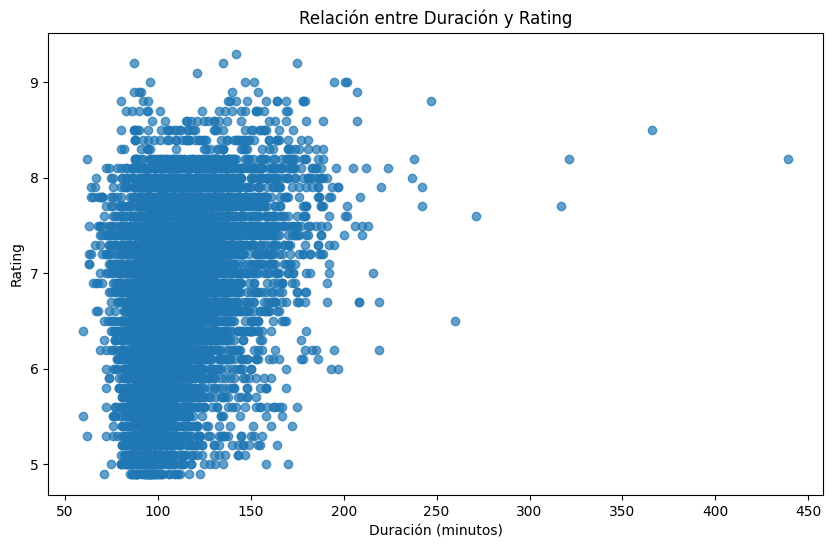

In [43]:
plt.figure(figsize=(10, 6))
plt.scatter(df['runtime'], df['rating'], alpha=0.7)
plt.title('Relación entre Duración y Rating')
plt.xlabel('Duración (minutos)')
plt.ylabel('Rating')
plt.show()

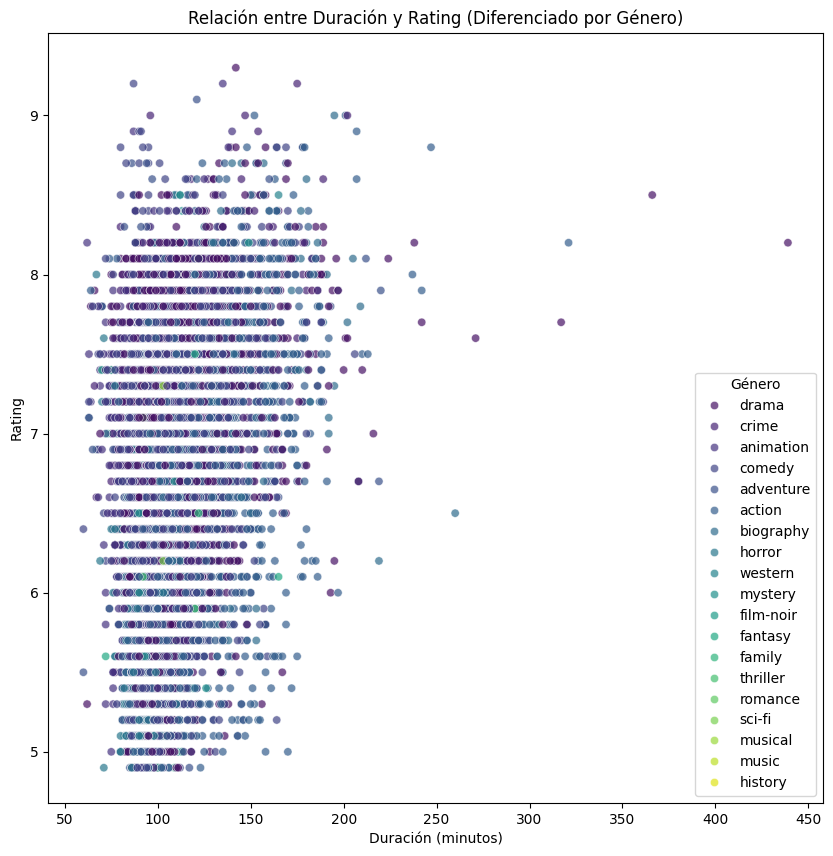

In [44]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='runtime', y='rating', hue='genre', data=df, palette='viridis', alpha=0.7)
plt.title('Relación entre Duración y Rating (Diferenciado por Género)')
plt.xlabel('Duración (minutos)')
plt.ylabel('Rating')
plt.legend(title='Género')
plt.show()

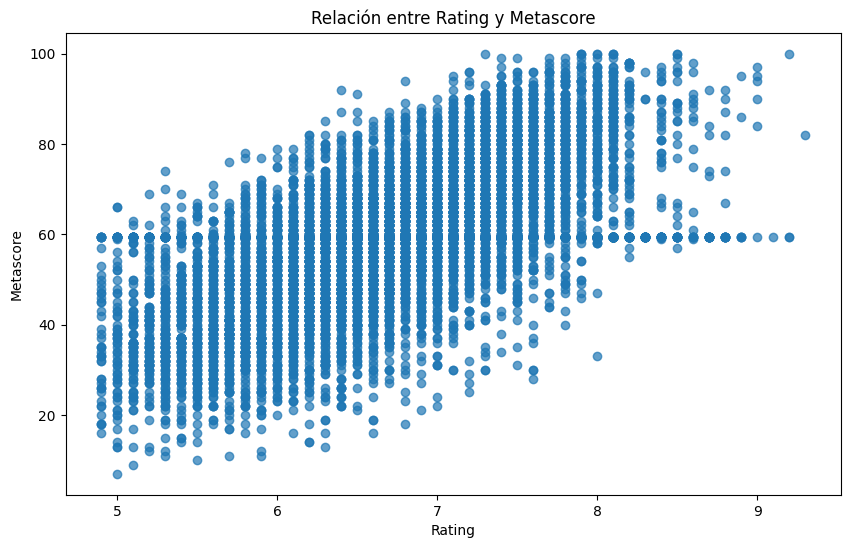

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(df['rating'], df['metascore'], alpha=0.7)
plt.title('Relación entre Rating y Metascore')
plt.xlabel('Rating')
plt.ylabel('Metascore')
plt.show()

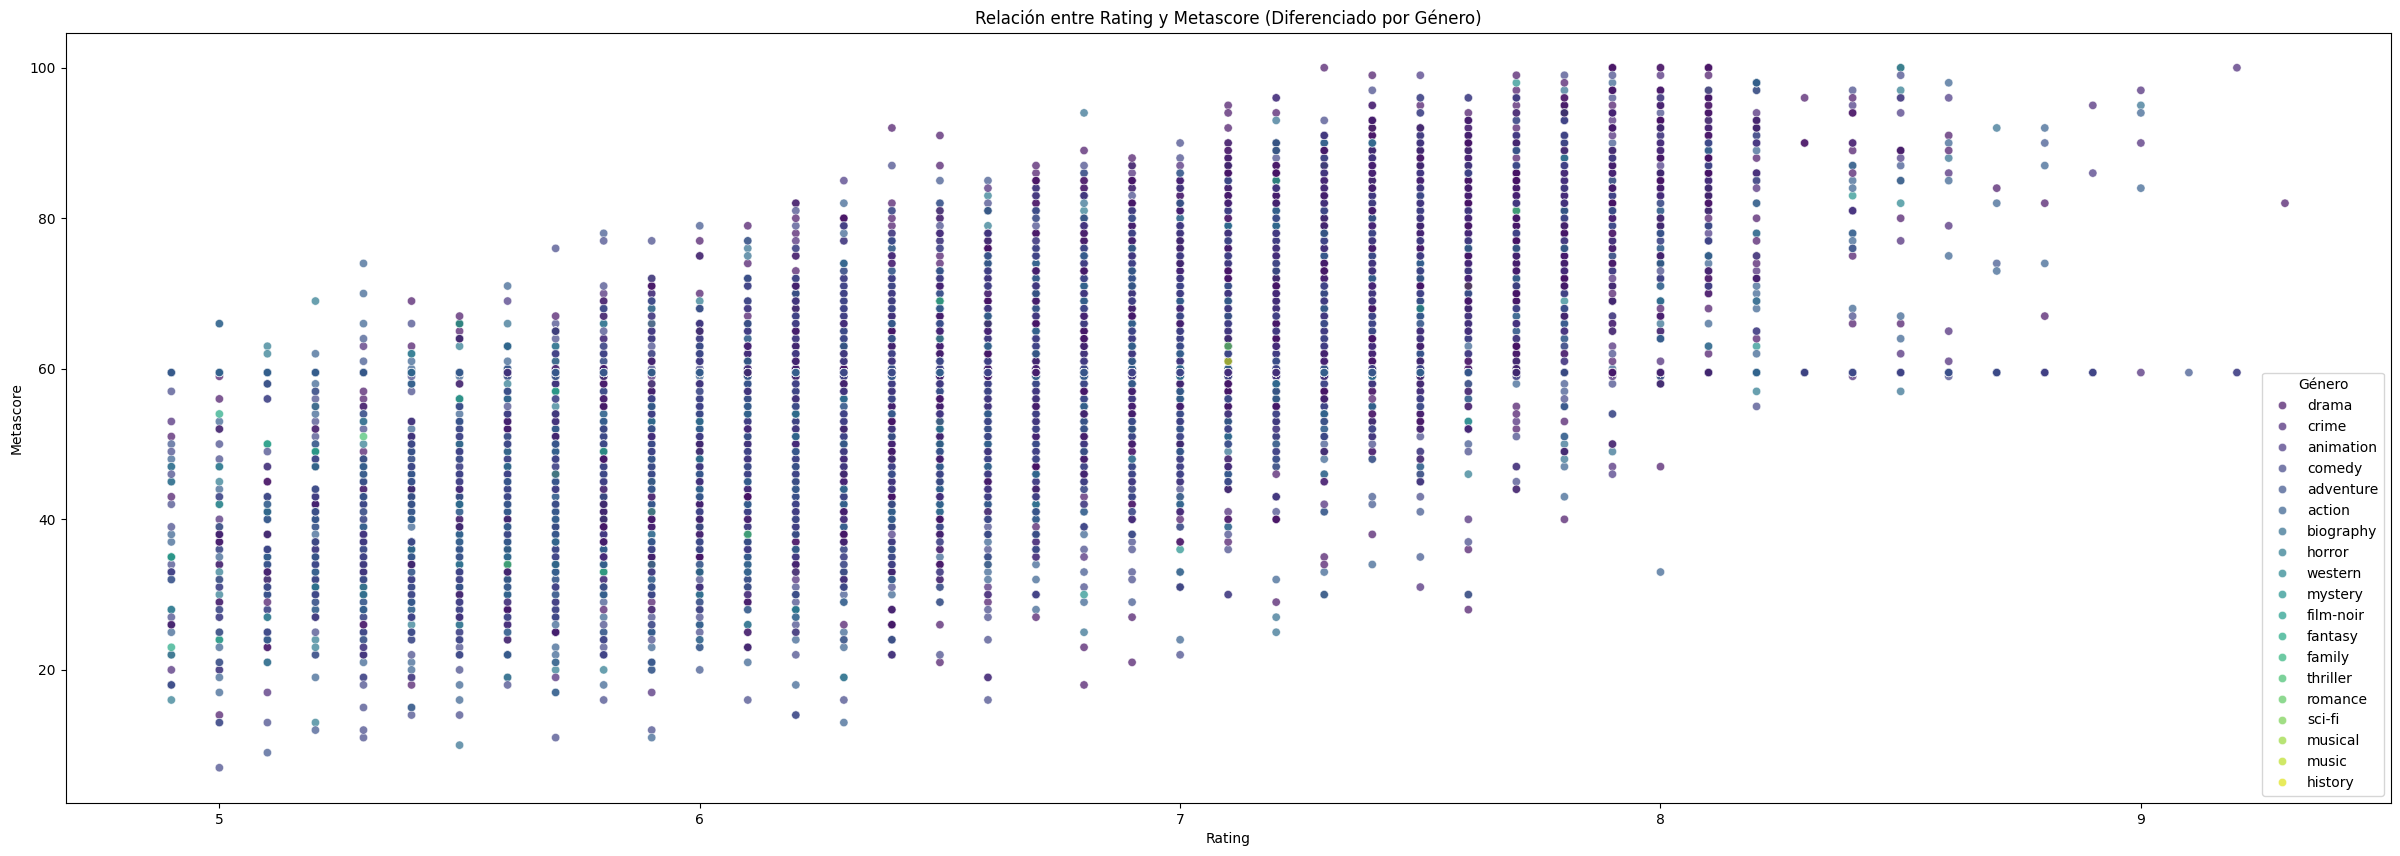

In [46]:
plt.figure(figsize=(30, 10))
sns.scatterplot(x='rating', y='metascore', hue='genre', data=df, palette='viridis', alpha=0.7)
plt.title('Relación entre Rating y Metascore (Diferenciado por Género)')
plt.xlabel('Rating')
plt.ylabel('Metascore')
plt.legend(title='Género')
plt.show()